In [13]:
from tensorflow.keras.datasets import fashion_mnist

In [14]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [15]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [17]:
model = Sequential()
#input_shape=(28, 28, 1) defines the shape of the input data. It's a 28x28 grayscale image.
#The 1 indicates that it's a single channel (grayscale). RGB images would have 3 here.
#64 is the number of filters/kernels. It means the layer will learn 64 different convolutional filters.
#(3, 3) is the size of each filter.
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28, 28, 1)))
# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))

#Dense(10, activation="softmax"): This layer has 10 neurons (since there are 10 classes in the classification task) and uses the softmax activation function.
#Softmax is used to ensure that the sum of the probabilities of the output classes is 1, which is necessary for multiclass classification.
model.add(Dense(10, activation = "softmax"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
import numpy as np
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)


Epoch 1/5
1500/1500 [==============================] - 63s 41ms/step - loss: 1.2149 - accuracy: 0.8496 - val_loss: 0.3461 - val_accuracy: 0.8791
Epoch 2/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2850 - accuracy: 0.9005 - val_loss: 0.3308 - val_accuracy: 0.8873
Epoch 3/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2423 - accuracy: 0.9124 - val_loss: 0.3388 - val_accuracy: 0.8824
Epoch 4/5
1500/1500 [==============================] - 67s 44ms/step - loss: 0.2159 - accuracy: 0.9200 - val_loss: 0.3509 - val_accuracy: 0.8815
Epoch 5/5
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2030 - accuracy: 0.9252 - val_loss: 0.3635 - val_accuracy: 0.8859


In [21]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 3s 9ms/step - loss: 0.3778 - accuracy: 0.8843


In [22]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']


In [25]:
# index = int(input("Enter the index of the thing u want to print"))
predictions = model.predict(test_x[:5])

1/1 [==============================] - 0s 67ms/step


Prediction for image 1:
Label: ankle_boots, Confidence: 100.00%


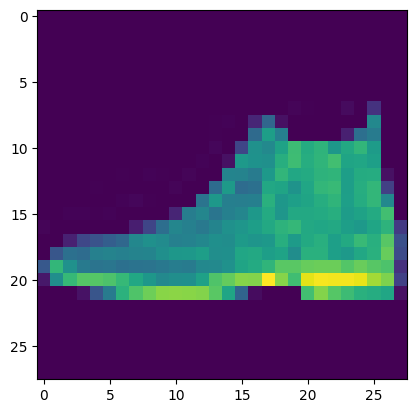

Prediction for image 2:
Label: pullover, Confidence: 100.00%


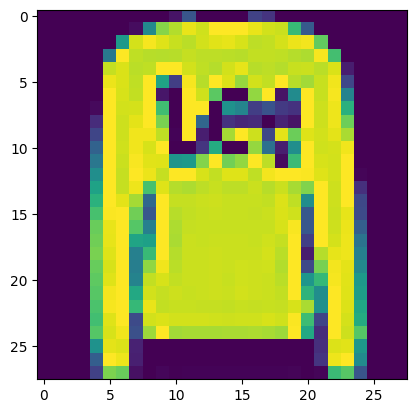

Prediction for image 3:
Label: trouser, Confidence: 100.00%


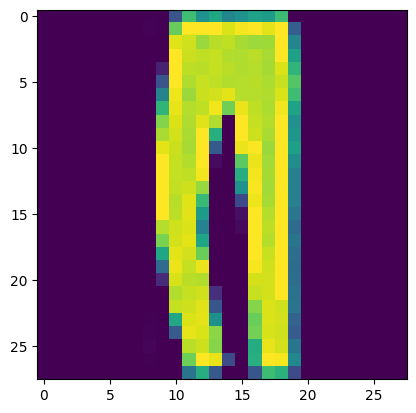

Prediction for image 4:
Label: trouser, Confidence: 100.00%


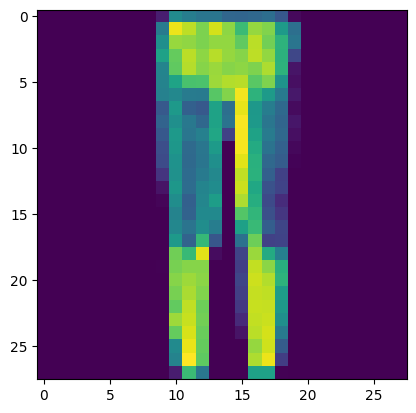

Prediction for image 5:
Label: shirt, Confidence: 58.25%


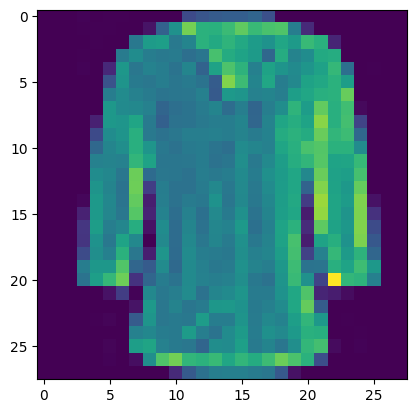

In [26]:
import matplotlib.pyplot as plt

for i, prediction in enumerate(predictions):
    label_index = np.argmax(prediction)
    label = labels[label_index]
    confidence_score = prediction[label_index]
    print("Prediction for image {}:".format(i+1))
    print("Label: {}, Confidence: {:.2f}%".format(label, confidence_score * 100))

    plt.imshow(test_x[:5][i])
    plt.show()

In [28]:
test_y[:5]

array([9, 2, 1, 1, 6], dtype=uint8)